In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv('/content/ecommerce_customer_data_large.csv')

In [ ]:
# Check for missing values before cleaning
missing_values_before = df.isnull().sum()



In [ ]:
missing_values_before

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [ ]:
# Data Cleaning Method:
# Fill numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [ ]:
# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Check for missing values after cleaning
missing_values_after = df.isnull().sum()

In [ ]:
missing_values_after

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [ ]:
# Display the first few observations of the cleaned dataset
cleaned_head = print(df.head())

   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  
0   31  

In [ ]:
# Display the corresponding statistics
cleaned_stats = df.describe()

In [ ]:
#Outlier detection
column = 'Total Purchase Amount'

In [ ]:
# Calculating IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Determining boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identifying outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Removing outliers
df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Observations and statistics before and after removing outliers
observations_before = print(df[column].describe())


count    250000.000000
mean       2725.385196
std        1442.576095
min         100.000000
25%        1476.000000
50%        2725.000000
75%        3975.000000
max        5350.000000
Name: Total Purchase Amount, dtype: float64


In [ ]:
observations_after = print(df_cleaned[column].describe())

count    250000.000000
mean       2725.385196
std        1442.576095
min         100.000000
25%        1476.000000
50%        2725.000000
75%        3975.000000
max        5350.000000
Name: Total Purchase Amount, dtype: float64


In [ ]:
# Convert 'Purchase Date' to a datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Extract the 'Year' from 'Purchase Date'
df['Year'] = df['Purchase Date'].dt.year

# Displaying the first few rows to confirm the conversion
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Year
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,2023
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,2021
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,2020
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0,2023
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0,2021


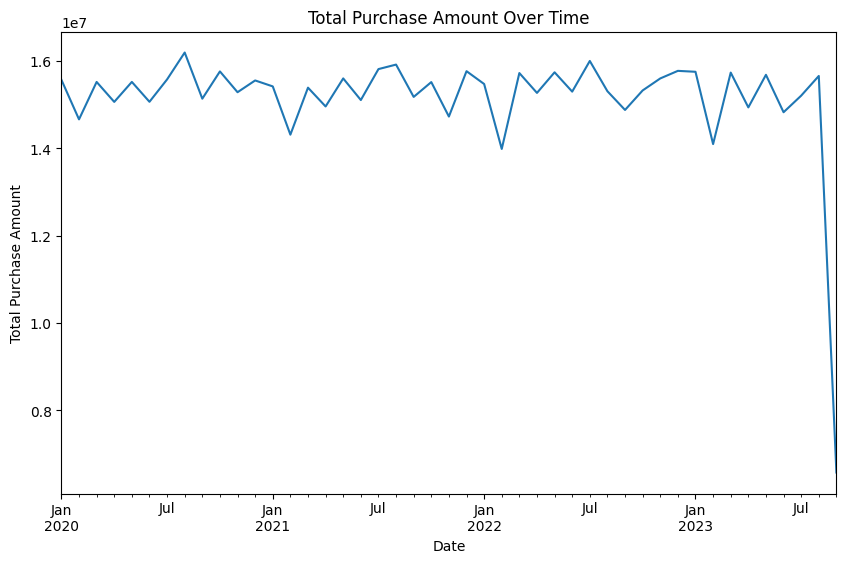

In [ ]:
# 1. Line Plot - Total Purchase Amount over Time
line_plot_data = df.groupby(df['Purchase Date'].dt.to_period("M"))['Total Purchase Amount'].sum()
plt.figure(figsize=(10, 6))
line_plot_data.plot(kind='line', title='Total Purchase Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.show()

<Figure size 1000x600 with 0 Axes>

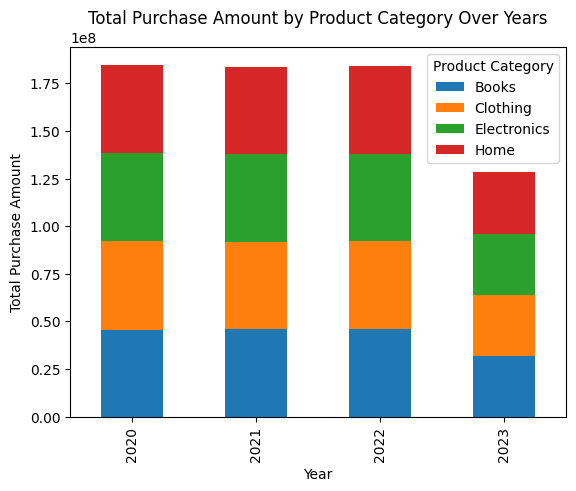

In [ ]:

stacked_bar_data = df.groupby(['Year', 'Product Category'])['Total Purchase Amount'].sum().unstack()

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
stacked_bar_data.plot(kind='bar', stacked=True)
plt.title('Total Purchase Amount by Product Category Over Years')
plt.xlabel('Year')
plt.ylabel('Total Purchase Amount')
plt.show()


<Figure size 1200x800 with 0 Axes>

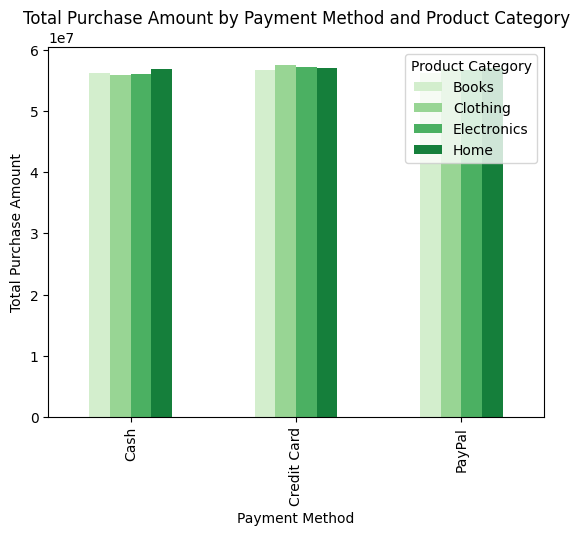

In [ ]:
grouped_bar_data_alt = df.groupby(['Payment Method', 'Product Category'])['Total Purchase Amount'].sum().unstack()

# Selecting a palette with shades of green
green_palette = sns.color_palette("Greens", n_colors=len(grouped_bar_data_alt.columns))

# Plotting the grouped bar plot with the green palette
plt.figure(figsize=(12, 8))
grouped_bar_data_alt.plot(kind='bar', color=green_palette, title='Total Purchase Amount by Payment Method and Product Category')
plt.xlabel('Payment Method')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Product Category')
plt.show()

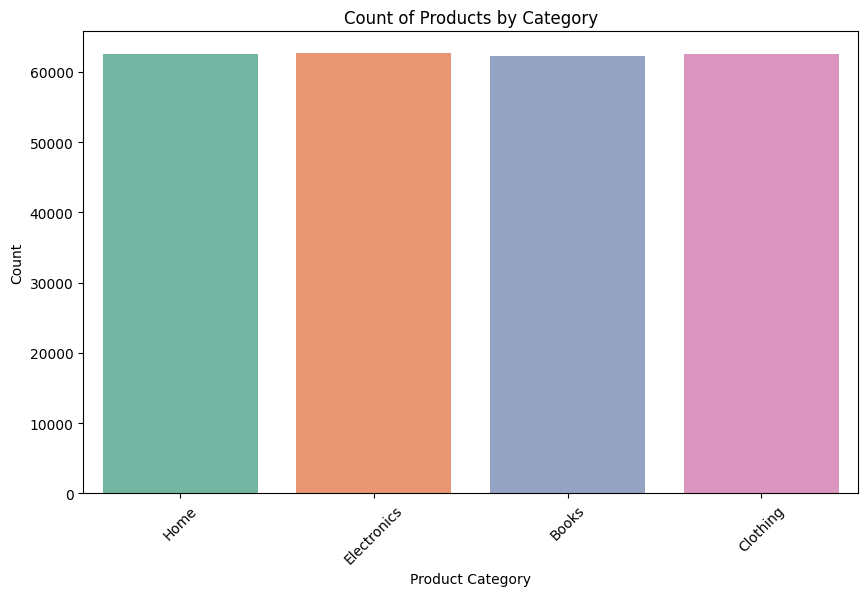

In [ ]:
# Creating the count plot for 'Product Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=df, palette='Set2')
plt.title('Count of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

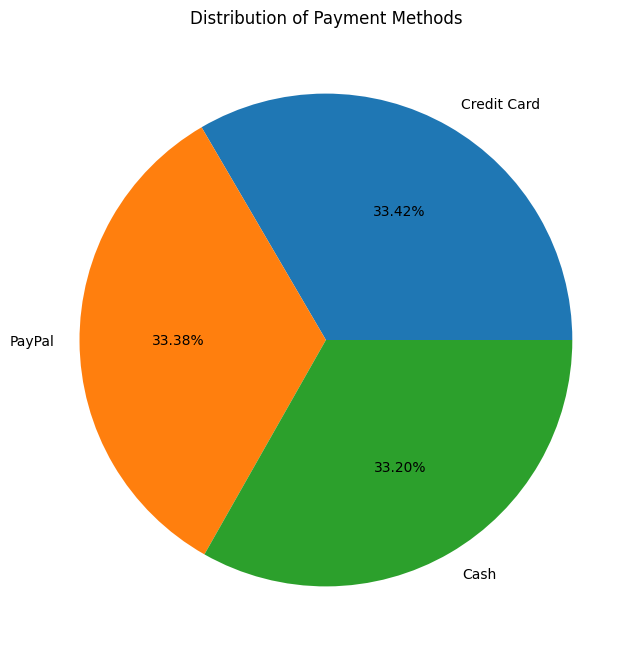

In [ ]:
# 4. Pie Chart
pie_data_payment = df['Payment Method'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
pie_data_payment.plot(kind='pie', autopct='%1.2f%%', title='Distribution of Payment Methods')
plt.ylabel('')  # Hiding the y-axis label for clarity
plt.show()

<ipython-input-93-afa2a1a88ef7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sample['Product Price'], kde=True, hist=True, color='green')


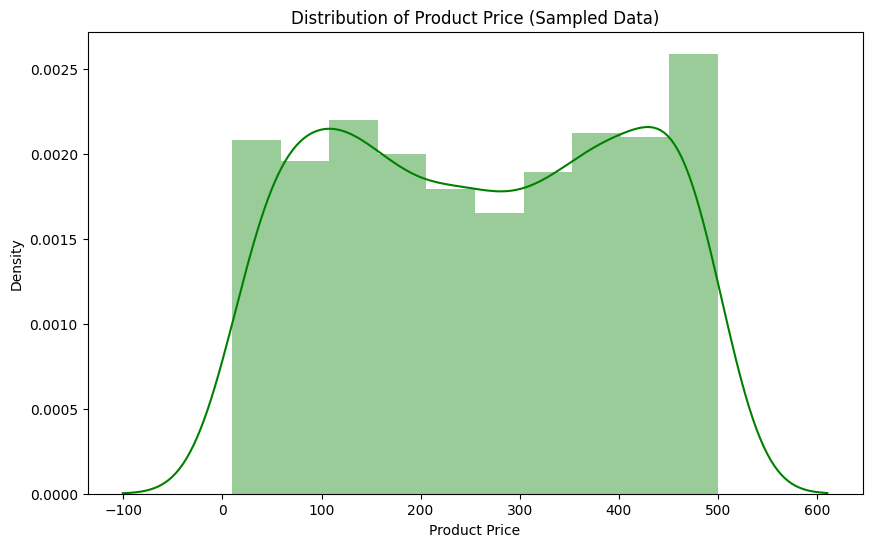

In [ ]:
# 5. Dist Plot
df_sample = df.sample(n=1000, random_state=42)

# Creating a distribution plot for 'Product Price'
plt.figure(figsize=(10, 6))
sns.distplot(df_sample['Product Price'], kde=True, hist=True, color='green')
plt.title('Distribution of Product Price (Sampled Data)')
plt.xlabel('Product Price')
plt.ylabel('Density')
plt.show()

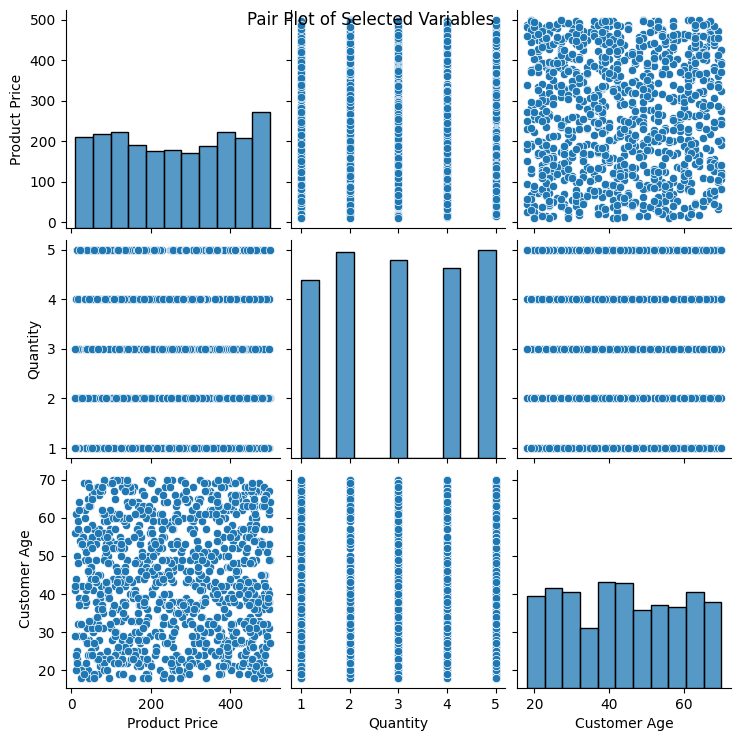

In [ ]:
# 6. Pair Plot
df_sample = df.sample(n=1000, random_state=42)

# Creating a subset with selected variables for the pair plot
pair_plot_subset = df_sample[['Product Price', 'Quantity', 'Customer Age']]

# Generating the pair plot with the subset
sns.pairplot(pair_plot_subset)
plt.suptitle('Pair Plot of Selected Variables')
plt.show()

<ipython-input-95-29512ee6d785>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', cbar=True)


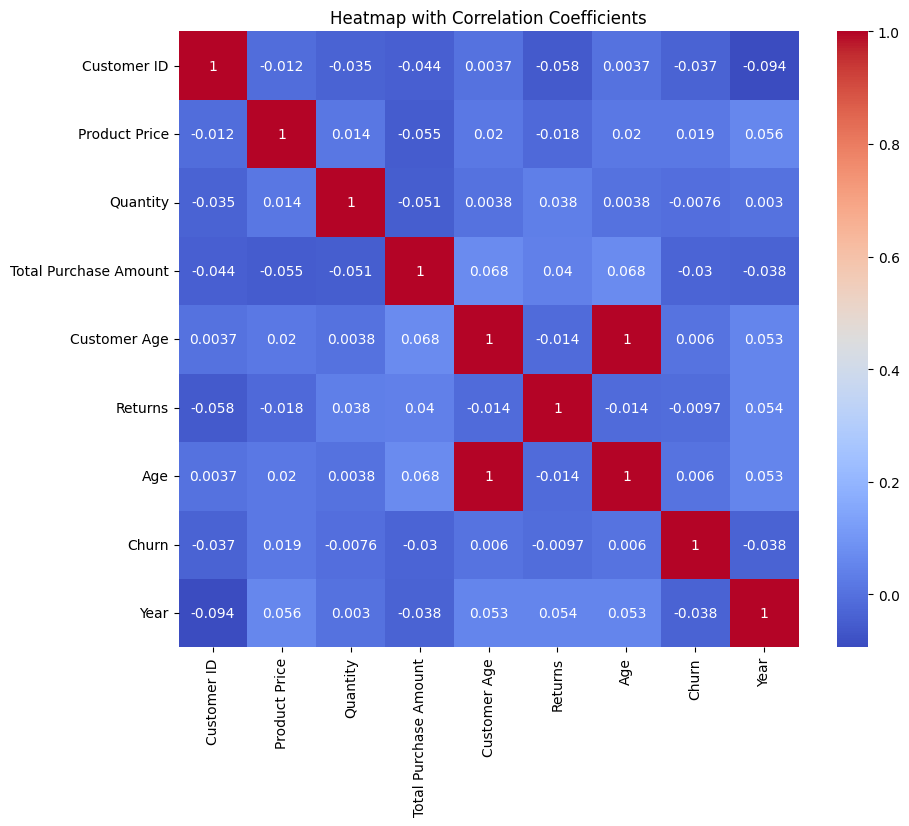

In [ ]:
# 7. Heatmap with cbar
plt.figure(figsize=(10, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap with Correlation Coefficients")
plt.show()

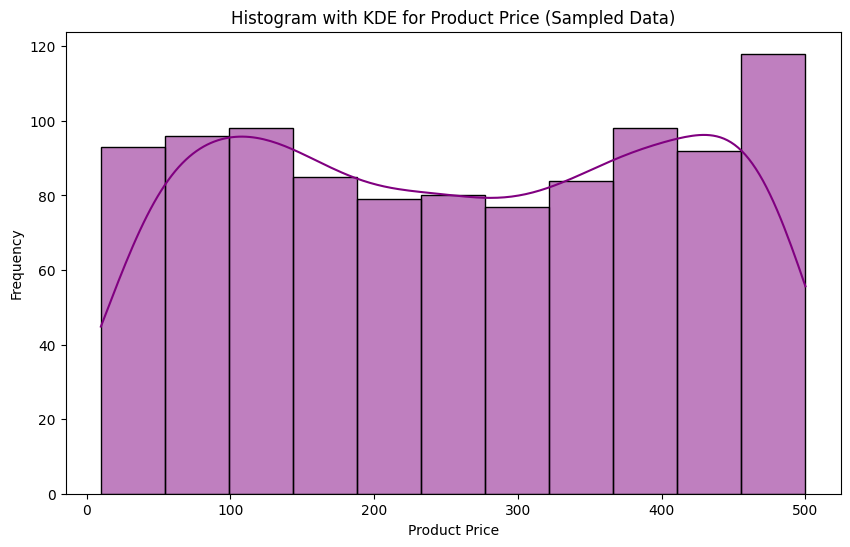

In [ ]:
# 8. Histogram plot with KDE
df_sample = df.sample(n=1000, random_state=42)

# Creating the histogram with KDE for 'Product Price'
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['Product Price'], kde=True, color='purple')
plt.title('Histogram with KDE for Product Price (Sampled Data)')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

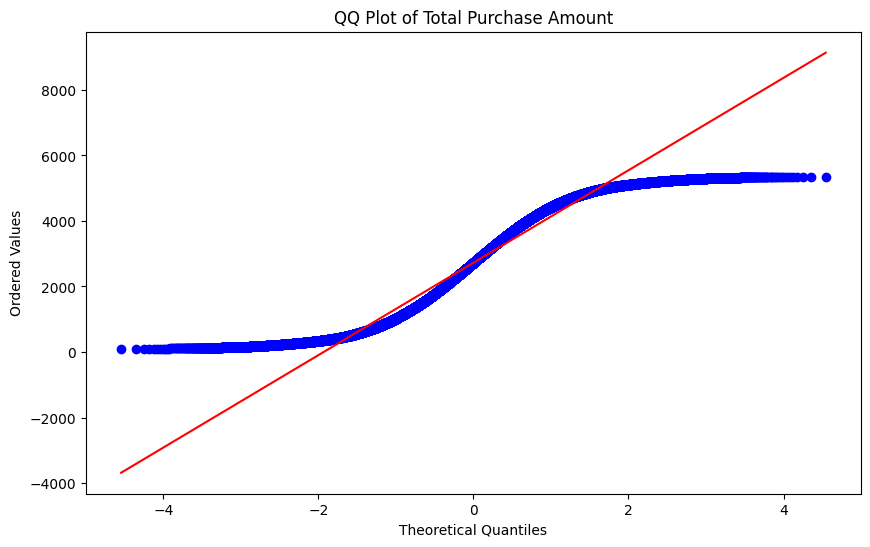

In [ ]:
# 9. QQ-plot
plt.figure(figsize=(10, 6))
stats.probplot(df['Total Purchase Amount'], dist="norm", plot=plt)
plt.title('QQ Plot of Total Purchase Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

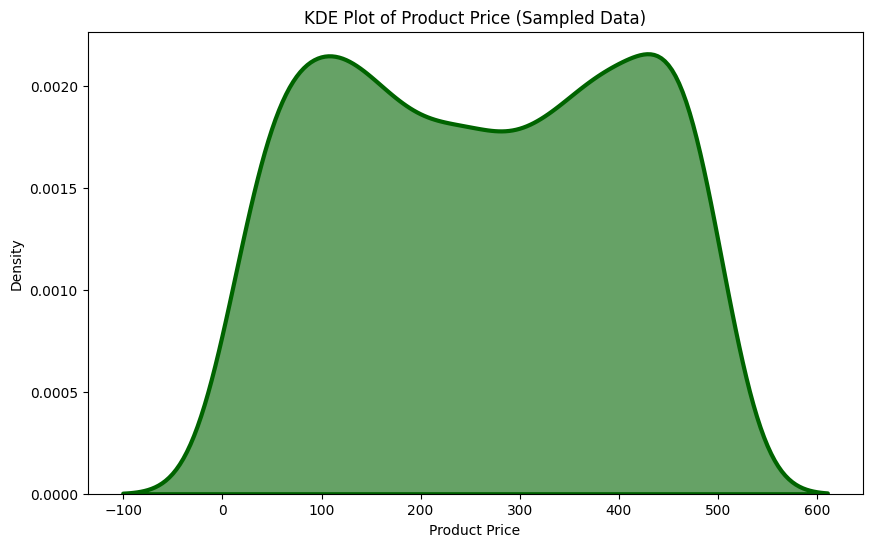

In [ ]:
# KDE plot with fill, alpha, palette, and linewidth
df_sample = df.sample(n=1000, random_state=42)

# Creating the KDE plot for 'Product Price'
plt.figure(figsize=(10, 6))
sns.kdeplot(df_sample['Product Price'], fill=True, alpha=0.6, color='darkgreen', linewidth=3)
plt.title('KDE Plot of Product Price (Sampled Data)')
plt.xlabel('Product Price')
plt.ylabel('Density')
plt.show()

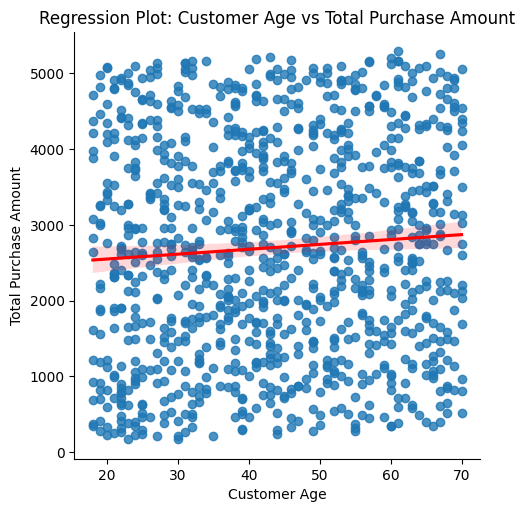

In [ ]:
df_sample = df.sample(n=1000, random_state=42)

# Creating an lmplot (regression plot) with a scatter representation and a regression line
sns.lmplot(x='Customer Age', y='Total Purchase Amount', data=df_sample, scatter=True, line_kws={'color': 'red'})
plt.title("Regression Plot: Customer Age vs Total Purchase Amount")
plt.xlabel('Customer Age')
plt.ylabel('Total Purchase Amount')
plt.show()

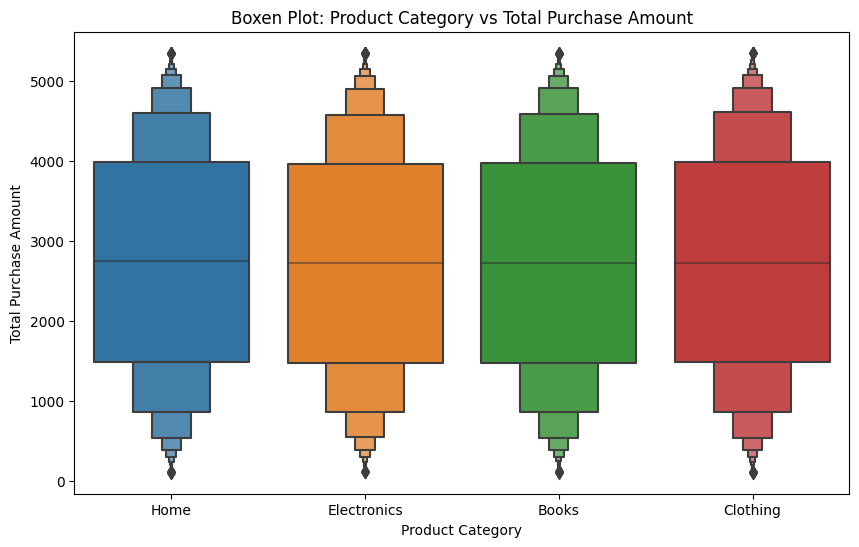

In [ ]:
# Multivariate Box or Boxen plot
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Product Category', y='Total Purchase Amount', data=df)
plt.title("Boxen Plot: Product Category vs Total Purchase Amount")
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.show()

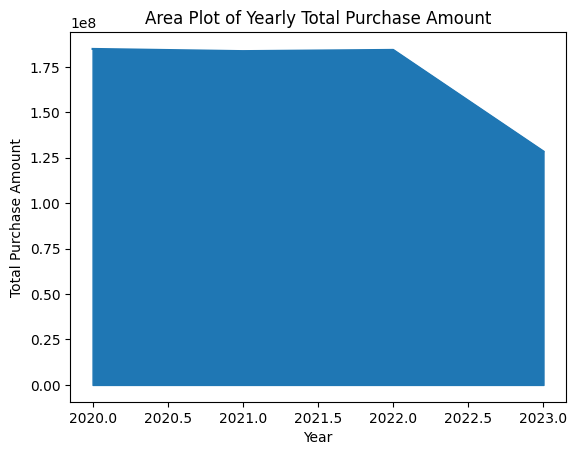

In [ ]:
# Area plot for yearly total purchase amount
yearly_sales = df.groupby('Year')['Total Purchase Amount'].sum()
yearly_sales.plot(kind='area')
plt.title("Area Plot of Yearly Total Purchase Amount")
plt.xlabel('Year')
plt.ylabel('Total Purchase Amount')
plt.show()

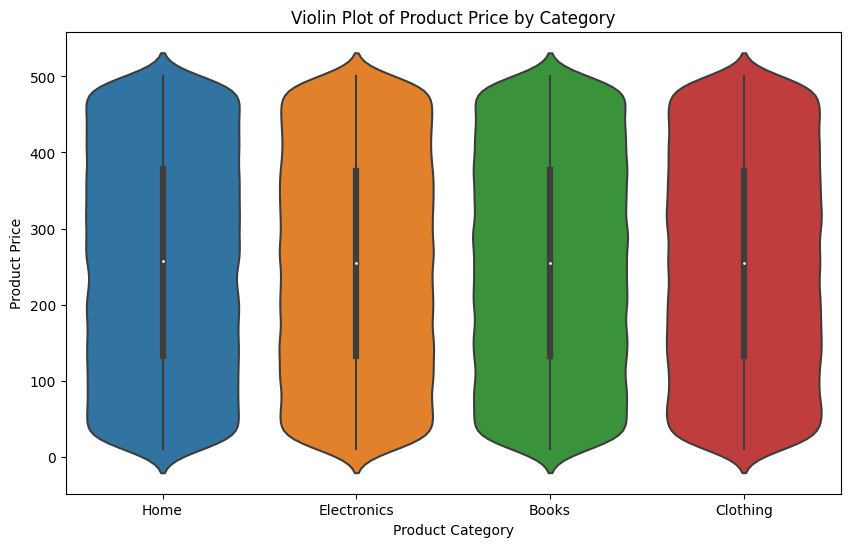

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product Category', y='Product Price', data=df)
plt.title("Violin Plot of Product Price by Category")
plt.xlabel('Product Category')
plt.ylabel('Product Price')
plt.show()

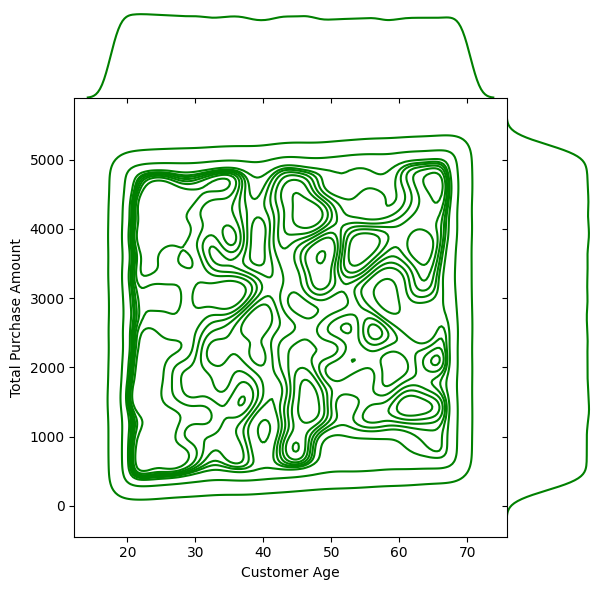

In [ ]:
# Joint plot with KDE and scatter representation
sns.jointplot(x='Customer Age', y='Total Purchase Amount', data=df, kind='kde', space=0, color='g')
plt.show()

<ipython-input-104-d2b4b71f663d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_sample['Product Price'], shade=True, color="blue", alpha=0.6, linewidth=2)


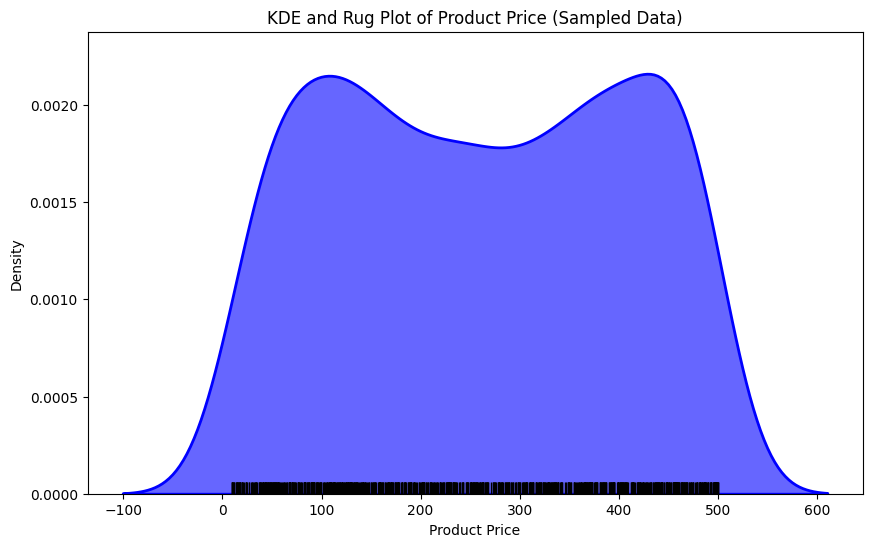

In [ ]:
# Rug plot for Customer Age distribution
df_sample = df.sample(n=1000, random_state=42)

# Creating a KDE plot with an overlaid rug plot for 'Product Price'
plt.figure(figsize=(10, 6))
sns.kdeplot(df_sample['Product Price'], shade=True, color="blue", alpha=0.6, linewidth=2)
sns.rugplot(df_sample['Product Price'], color="black")
plt.title("KDE and Rug Plot of Product Price (Sampled Data)")
plt.xlabel('Product Price')
plt.ylabel('Density')
plt.show()

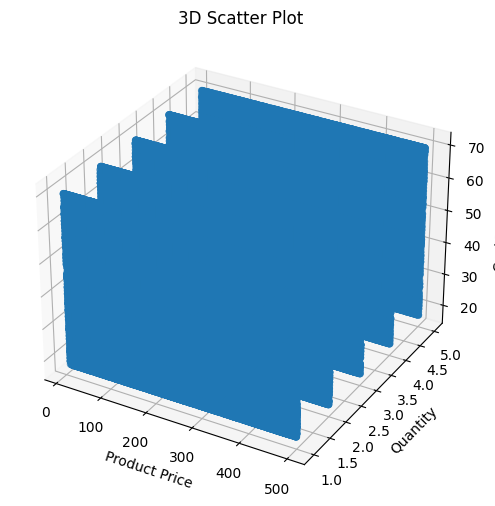

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Product Price'], df['Quantity'], df['Customer Age'])
ax.set_title('3D Scatter Plot')
ax.set_xlabel('Product Price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Customer Age')
plt.show()

<ipython-input-113-caf46cc78489>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), cmap='coolwarm', annot=True, figsize=(10, 8))


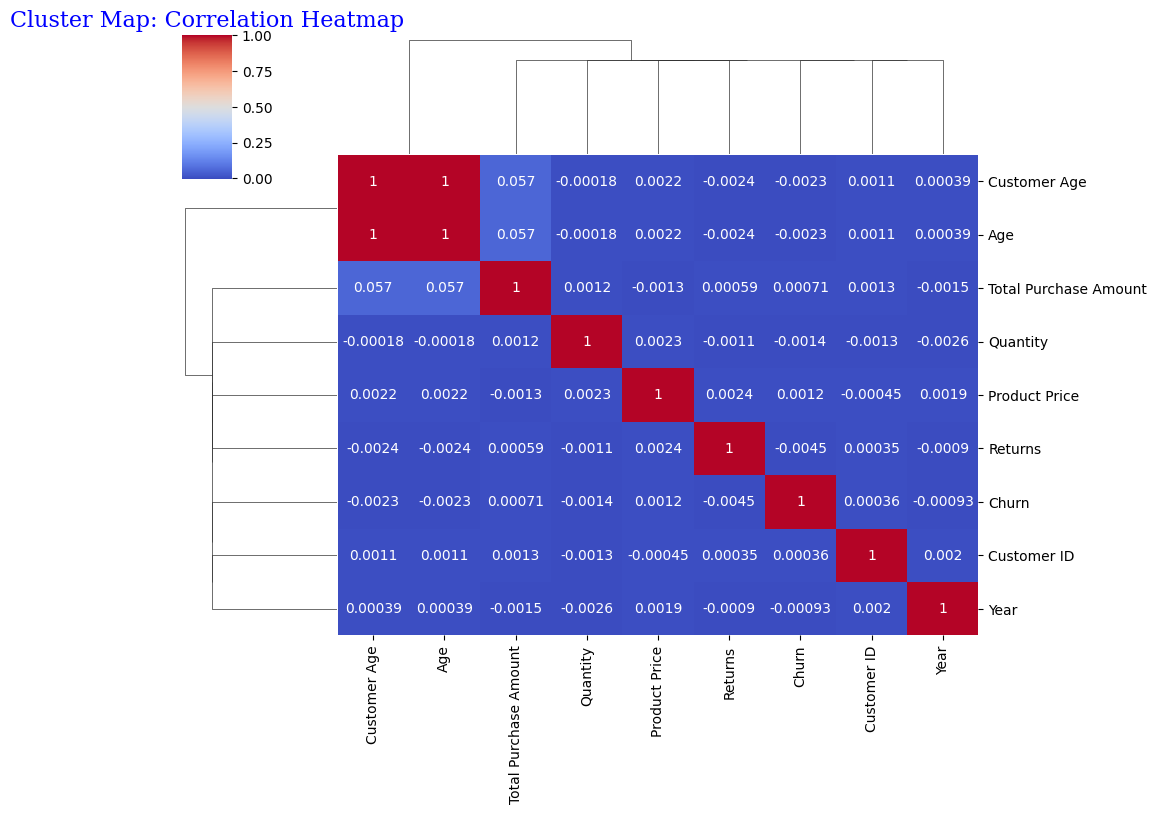

In [ ]:
sns.clustermap(df.corr(), cmap='coolwarm', annot=True, figsize=(10, 8))
plt.title('Cluster Map: Correlation Heatmap',fontdict={'fontname': 'serif', 'color': 'blue', 'size': 16})
plt.show()

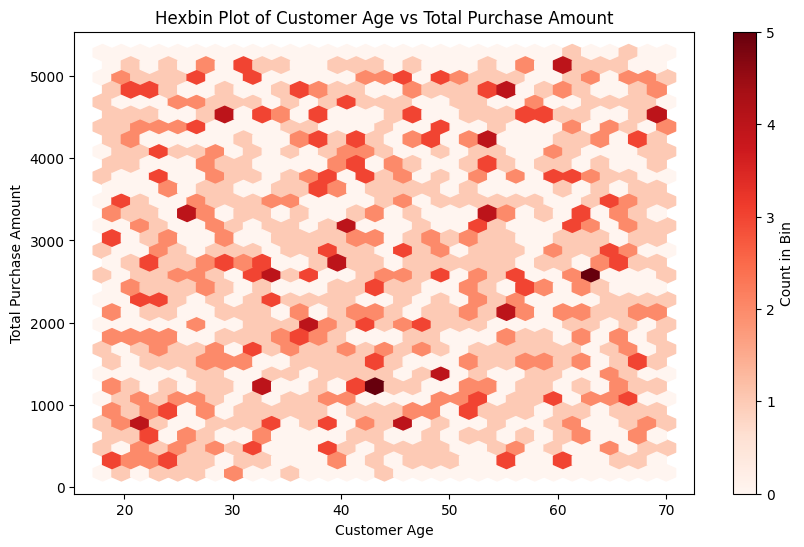

In [ ]:
# Taking a random sample from the dataset to make the plot clearer and more manageable
df_sample = df.sample(n=1000, random_state=42)

# Generating the Hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df_sample['Customer Age'], df_sample['Total Purchase Amount'], gridsize=30, cmap='Reds')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Customer Age vs Total Purchase Amount')
plt.xlabel('Customer Age')
plt.ylabel('Total Purchase Amount')
plt.show()

<ipython-input-106-cf361a3fc97c>:10: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k_sample = kde.gaussian_kde([x_sample, y_sample])


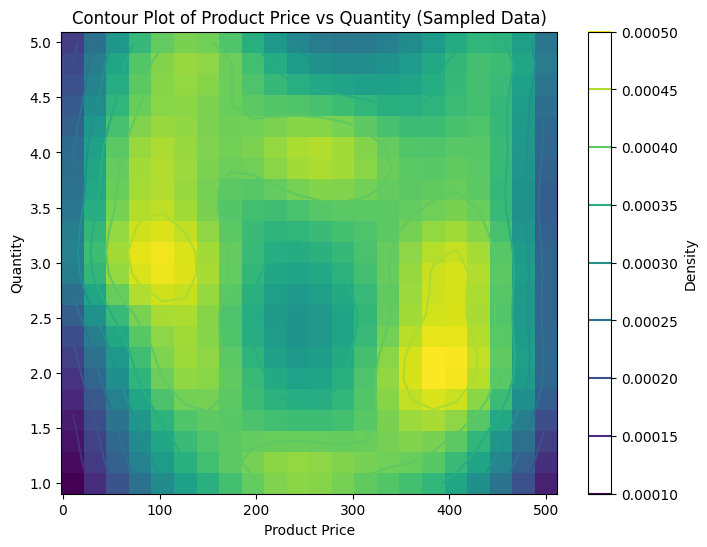

In [ ]:

import numpy as np
from scipy.stats import kde
df_sample = df.sample(n=500, random_state=42)

# Selecting 'Product Price' and 'Quantity' for the contour plot
x_sample = df_sample['Product Price']
y_sample = df_sample['Quantity']

# Calculate the point density for the sample
k_sample = kde.gaussian_kde([x_sample, y_sample])
xi_sample, yi_sample = np.mgrid[x_sample.min():x_sample.max():x_sample.size**0.5*1j, y_sample.min():y_sample.max():y_sample.size**0.5*1j]
zi_sample = k_sample(np.vstack([xi_sample.flatten(), yi_sample.flatten()]))

# Creating the contour plot for the sample
plt.figure(figsize=(8, 6))
plt.pcolormesh(xi_sample, yi_sample, zi_sample.reshape(xi_sample.shape), shading='auto', cmap=plt.cm.viridis)
plt.contour(xi_sample, yi_sample, zi_sample.reshape(xi_sample.shape))
plt.title('Contour Plot of Product Price vs Quantity (Sampled Data)')
plt.xlabel('Product Price')
plt.ylabel('Quantity')
plt.colorbar(label='Density')
plt.show()


<ipython-input-107-7361102aee38>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Payment Method', y='Product Price', data=df_sample, jitter=True, palette="plasma")


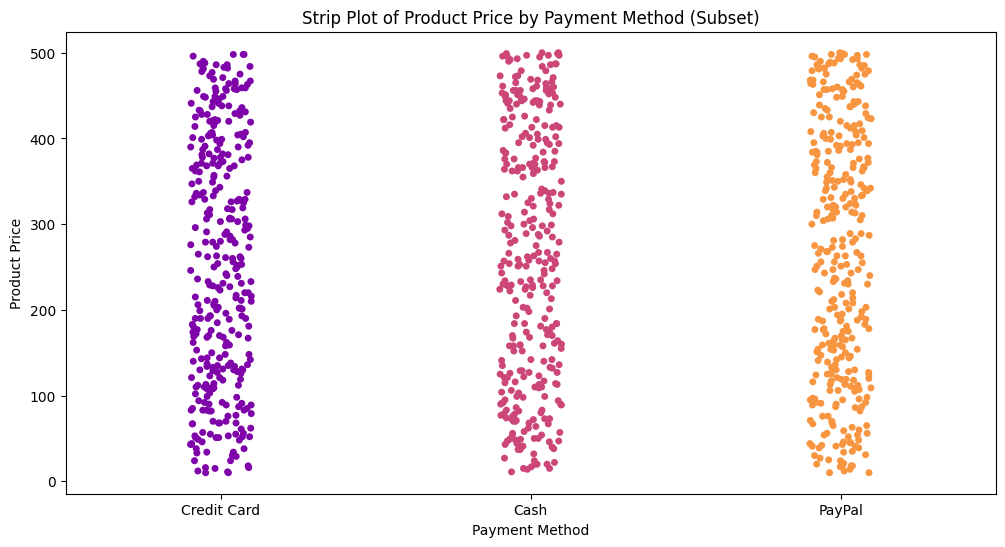

In [ ]:
df_sample = df.sample(n=1000, random_state=42)

plt.figure(figsize=(12, 6))
sns.stripplot(x='Payment Method', y='Product Price', data=df_sample, jitter=True, palette="plasma")
plt.title("Strip Plot of Product Price by Payment Method (Subset)")
plt.xlabel('Payment Method')
plt.ylabel('Product Price')
plt.show()

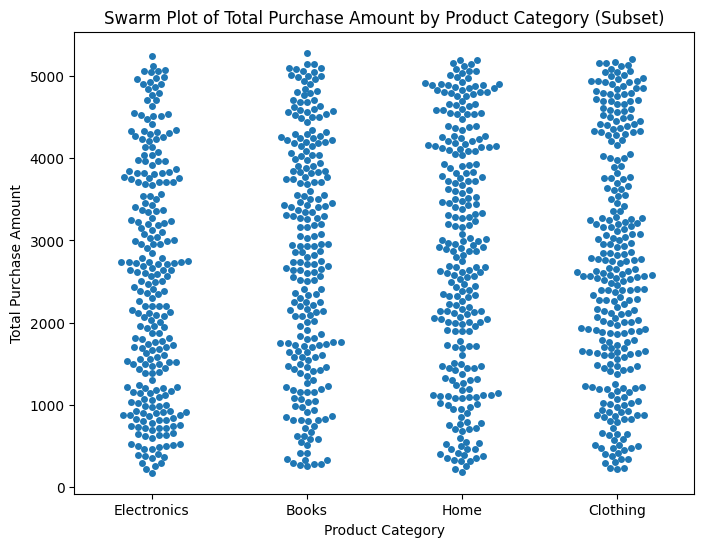

In [ ]:
# Selecting a subset of the data to make the plot more manageable
subset = df.sample(n=1000, random_state=42)  # Adjust the sample size as needed

# Creating a swarm plot with the subset
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Product Category', y='Total Purchase Amount', data=subset)
plt.title('Swarm Plot of Total Purchase Amount by Product Category (Subset)')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.show()

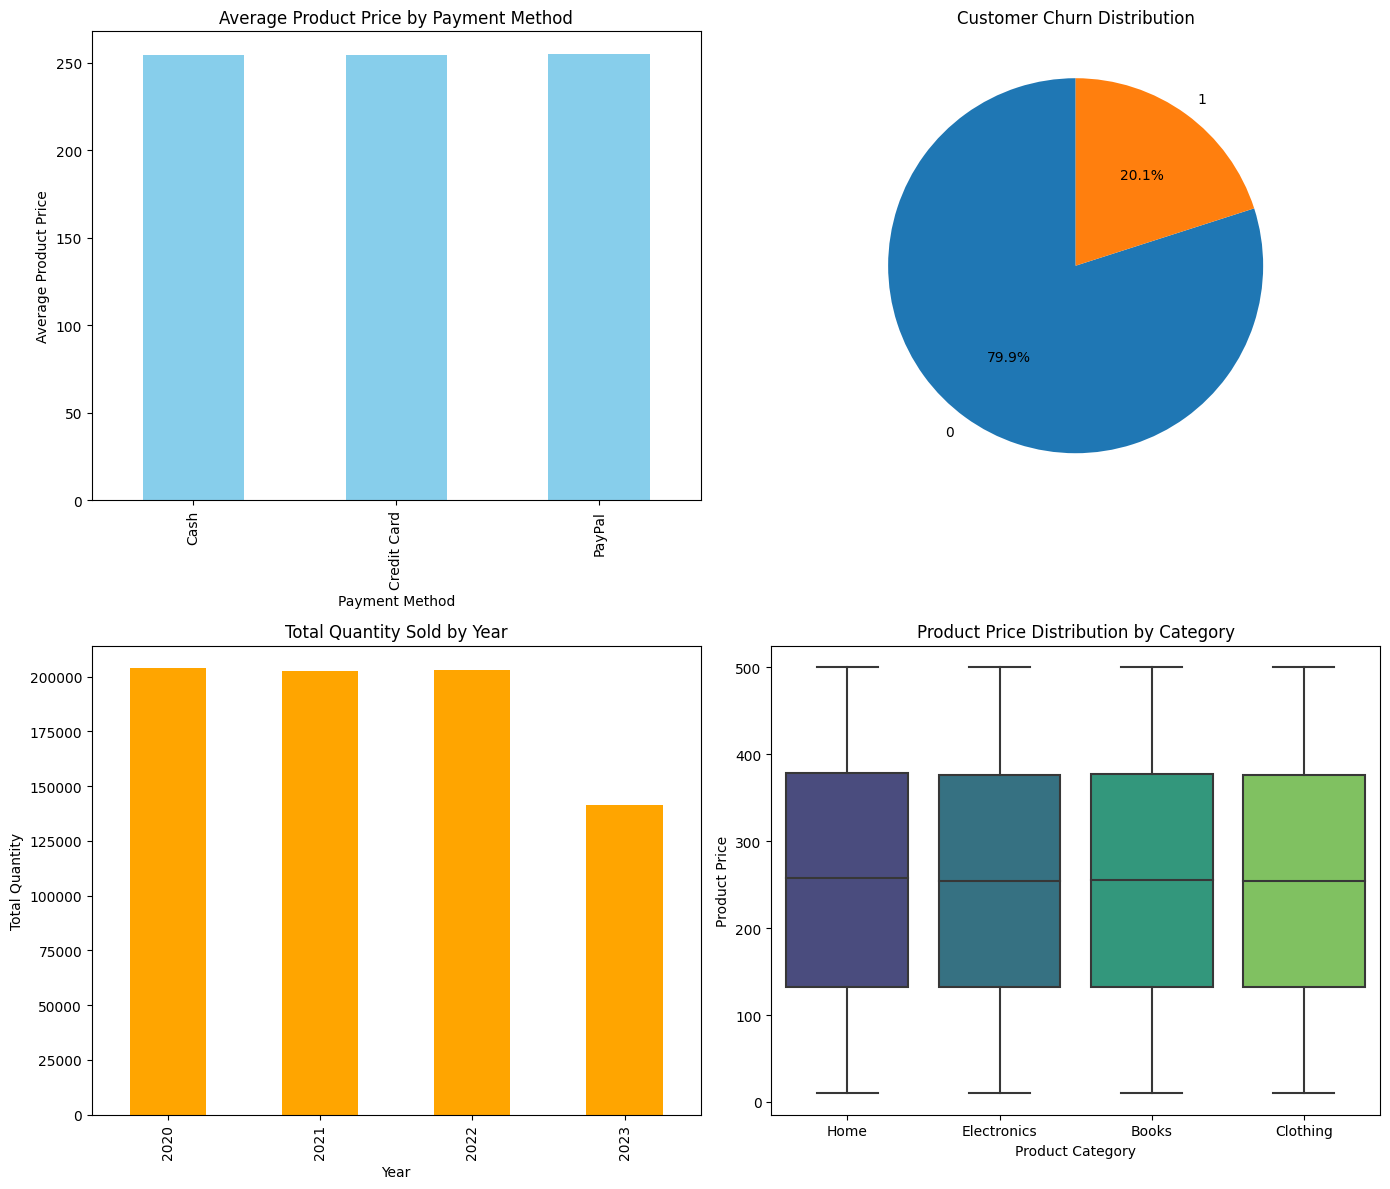

In [ ]:
# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Subplot 1: Bar chart of Average Product Price by Payment Method
avg_price_payment = df.groupby('Payment Method')['Product Price'].mean()
avg_price_payment.plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Average Product Price by Payment Method')
axes[0, 0].set_xlabel('Payment Method')
axes[0, 0].set_ylabel('Average Product Price')

# Subplot 2: Pie chart of Customer Churn
churn_distribution = df['Churn'].value_counts()
churn_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1], title='Customer Churn Distribution', startangle=90)
axes[0, 1].set_ylabel('')  # Hide the y-label

# Subplot 3: Bar chart of Total Quantity Sold by Year
quantity_year = df.groupby('Year')['Quantity'].sum()
quantity_year.plot(kind='bar', ax=axes[1, 0], color='orange', title='Total Quantity Sold by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Total Quantity')

# Subplot 4: Box plot of Product Price by Product Category
sns.boxplot(x='Product Category', y='Product Price', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Product Price Distribution by Category')
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Product Price')

# Adjusting layout for better visibility
plt.tight_layout()
plt.show()


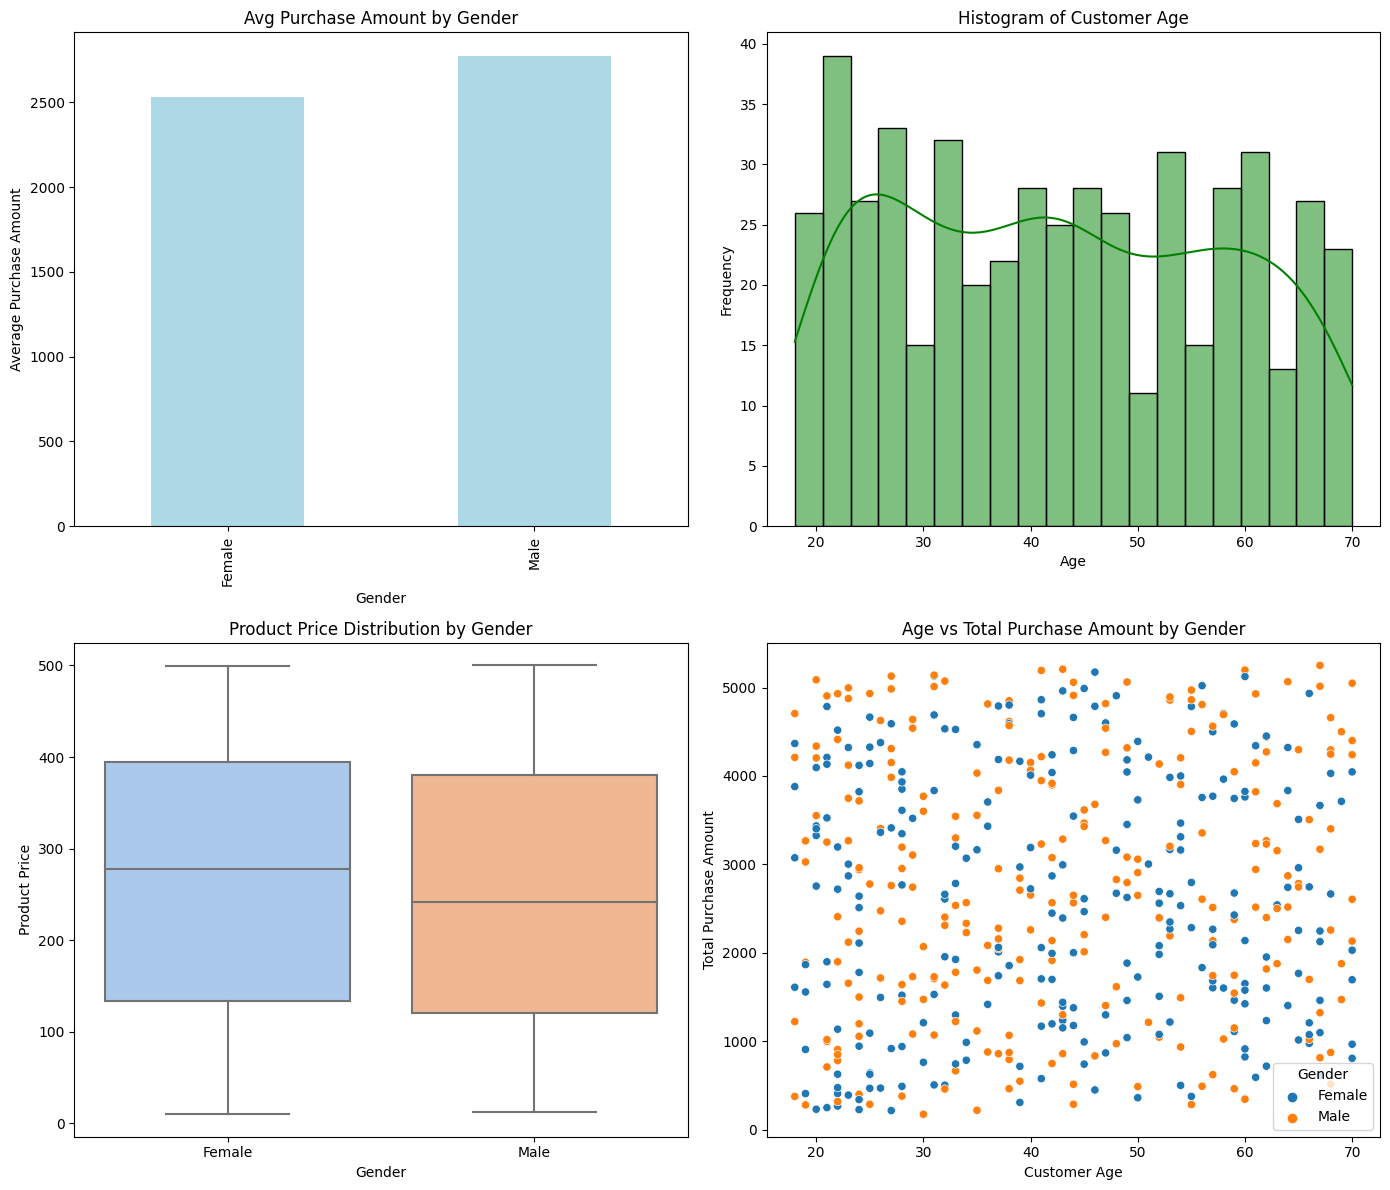

In [ ]:
df_sample = df.sample(n=500, random_state=42)  # Sample size of 500

# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Subplot 1: Bar Chart of Average Total Purchase Amount by Gender
avg_purchase_by_gender = df_sample.groupby('Gender')['Total Purchase Amount'].mean()
avg_purchase_by_gender.plot(kind='bar', ax=axes[0, 0], color='lightblue', title='Avg Purchase Amount by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Average Purchase Amount')

# Subplot 2: Pie Chart of Churn Distribution
sns.histplot(df_sample['Customer Age'], bins=20, ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title('Histogram of Customer Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Subplot 3: Box Plot of Product Price by Gender
sns.boxplot(x='Gender', y='Product Price', data=df_sample, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Product Price Distribution by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Product Price')

# Subplot 4: Scatter Plot of Age vs Total Purchase Amount
sns.scatterplot(x='Customer Age', y='Total Purchase Amount', data=df_sample, hue='Gender', ax=axes[1, 1])
axes[1, 1].set_title('Age vs Total Purchase Amount by Gender')
axes[1, 1].set_xlabel('Customer Age')
axes[1, 1].set_ylabel('Total Purchase Amount')

# Adjusting layout for better visibility
plt.tight_layout()
plt.show()

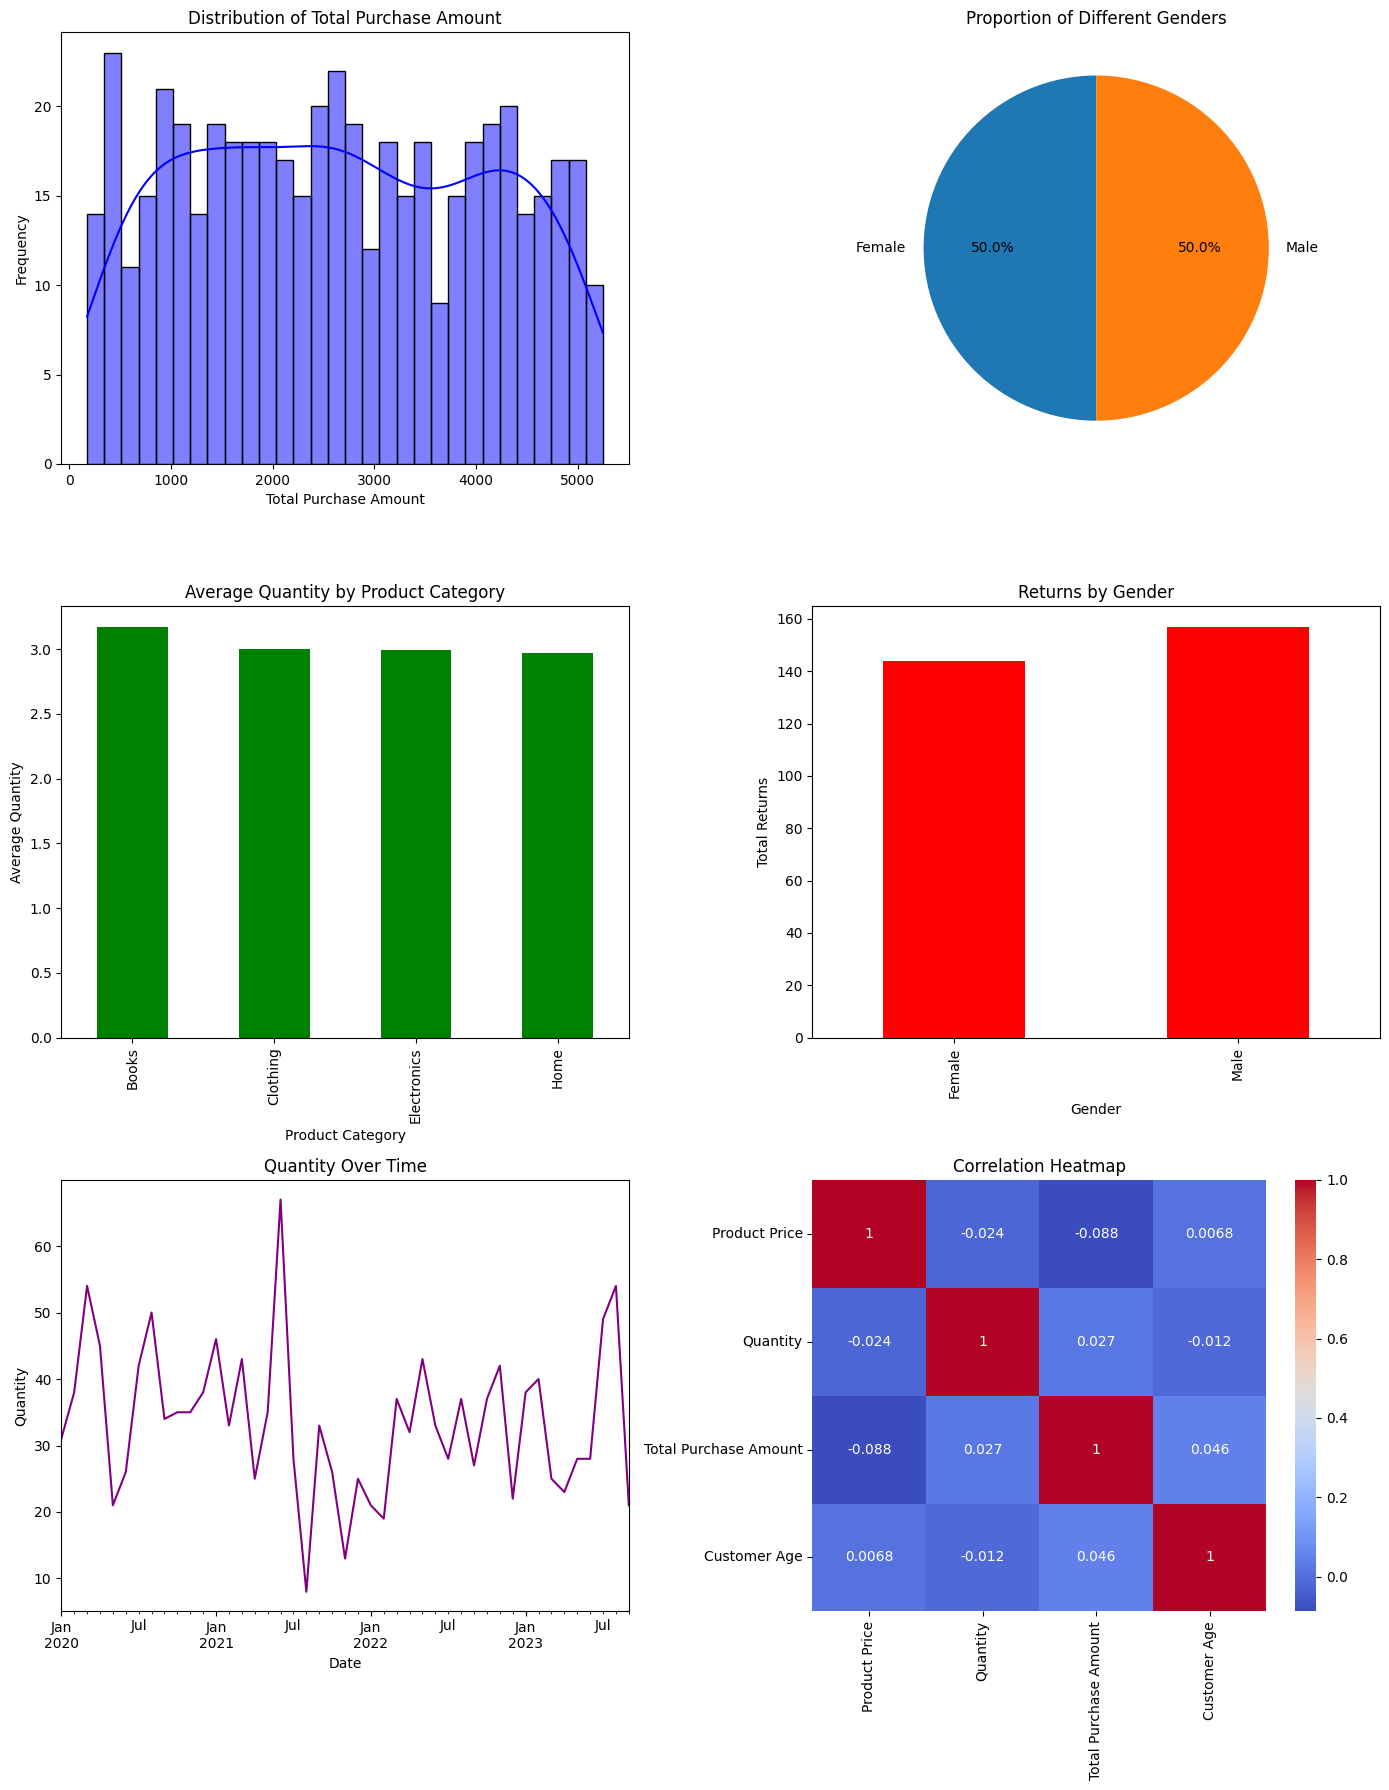

In [ ]:
df_sample = df.sample(n=500, random_state=42)

# Creating a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Subplot 1: Distribution of Total Purchase Amount
sns.histplot(df_sample['Total Purchase Amount'], kde=True, bins=30, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Total Purchase Amount')
axes[0, 0].set_xlabel('Total Purchase Amount')
axes[0, 0].set_ylabel('Frequency')

# Subplot 2: Proportion of Different Genders
gender_distribution = df_sample['Gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1], startangle=90)
axes[0, 1].set_title('Proportion of Different Genders')
axes[0, 1].set_ylabel('')  # Hide the y-label

# Subplot 3: Average Quantity by Product Category
avg_quantity_category = df_sample.groupby('Product Category')['Quantity'].mean()
avg_quantity_category.plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Average Quantity by Product Category')
axes[1, 0].set_xlabel('Product Category')
axes[1, 0].set_ylabel('Average Quantity')

# Subplot 4: Returns by Gender
returns_by_gender = df_sample.groupby('Gender')['Returns'].sum()
returns_by_gender.plot(kind='bar', ax=axes[1, 1], color='red')
axes[1, 1].set_title('Returns by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Total Returns')

# New Subplot 5: Line Plot of Quantity Over Time
quantity_over_time = df_sample.groupby(df_sample['Purchase Date'].dt.to_period("M"))['Quantity'].sum()
quantity_over_time.plot(kind='line', ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Quantity Over Time')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Quantity')

# New Subplot 6: Correlation Heatmap
sns.heatmap(df_sample[['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']].corr(), annot=True, cmap='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title('Correlation Heatmap')

# Adjusting layout for better visibility
plt.tight_layout()
plt.show()